In [1]:
import sklearn
import scipy
print(sklearn.__version__)
print(scipy.__version__)

1.3.0
1.12.0


In [8]:
!pip install scikit-learn==1.3.0 scipy==1.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 68.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 16.6 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Access to workspace directory
Make sure you have added the shortcut from the shared drive to your "My Drive"

In [ ]:
path = "/content/drive/My Drive/"
dir_list = os.listdir(path)
print(dir_list) # Make sure you see "data_workspace" in the listing

['rs', 'Colab Notebooks', 'data_workspace', 'cs']


# Load data into dataframe

## Read CSV

In [4]:
file_path = '/content/drive/MyDrive/data_workspace/selectedjobs41.csv'
df = pd.read_csv(file_path)

In [64]:
print(df)

            search_position  compliance  patient_care  dispensing_medications  \
0                 economist           0             0                       0   
1                pharmacist           0             0                       0   
2               electrician           0             0                       0   
3                   dentist           0             0                       0   
4                 economist           0             0                       0   
...                     ...         ...           ...                     ...   
2864  information_scientist           0             0                       0   
2865             pharmacist           0             0                       1   
2866              economist           0             0                       0   
2867             bookkeeper           0             0                       0   
2868              economist           0             0                       0   

      medication  pain_mana

## Drop unused columns

## Split x and y

In [102]:
df_x = df.drop(['search_position'], axis=1)

df_y = df.search_position

In [103]:
df_y.unique()

array(['economist', 'pharmacist', 'electrician', 'dentist',
       'mathematician', 'bookkeeper', 'information_scientist'],
      dtype=object)

## One hot encoding

In [104]:
df_y = pd.get_dummies(df_y, columns=['search_position'], prefix=None)

## Split training and test data

In [105]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y.bookkeeper, test_size=0.3, random_state=1) # 80% training and 30% test

# Train

In [106]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# prune
path = clf.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)

    # Train Decision Tree Classifer
    clf.fit(X_train, y_train)

    clfs.append(clf)

## Validate

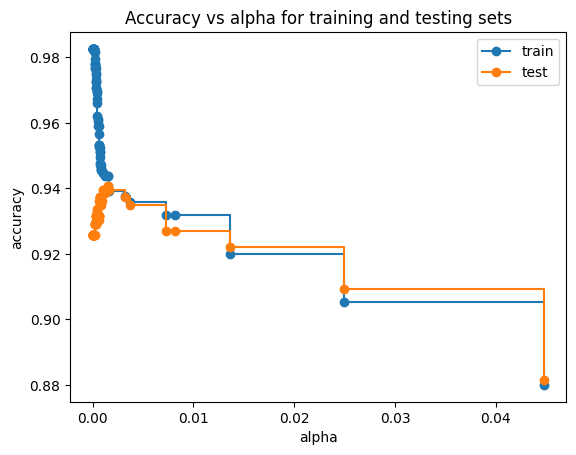

In [107]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()


## Optimal ccp_alpha

In [108]:
for i in range(len(ccp_alphas)):
  if(ccp_alphas[i] < 0.005 or ccp_alphas[i] > 0.04):
    continue
  print("index", i, "||", ccp_alphas[i], "||", test_scores[i])

clf = clfs[84]

index 85 || 0.007242610998165838 || 0.926829268292683
index 86 || 0.008174796901628853 || 0.926829268292683
index 87 || 0.013654008226092362 || 0.9221835075493612
index 88 || 0.02498723752167746 || 0.9094076655052264


## Top Features

In [109]:
most_features_frame = pd.DataFrame(
    data=clf.feature_importances_,
    columns=["importance"],
    index=X_train.columns,
).sort_values(by=["importance"], ascending=False)

# print(most_features_frame)
top_5_feature = most_features_frame.index[:5]
top_5_feature_list = [i for i in top_5_feature]
print(top_5_feature_list)

['financial_reporting.2', 'financial_statements', 'payroll.1', 'general_ledger', 'bookkeeping']


## Visualization

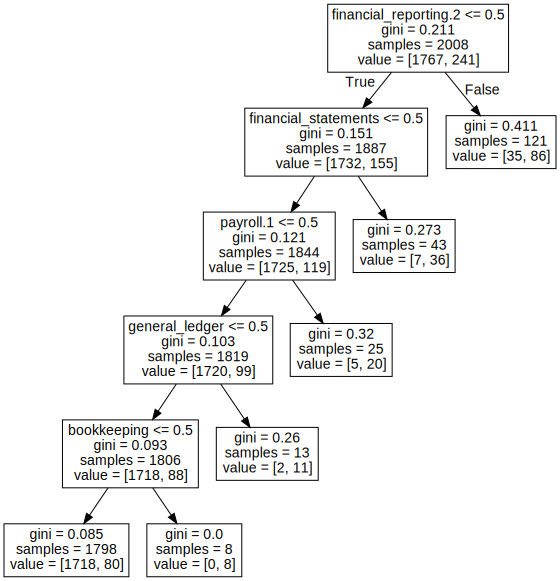

In [110]:
from graphviz import Source
from sklearn import tree

Source(tree.export_graphviz(clf, out_file=None, feature_names=df_x.columns))

## Predict

In [100]:
df_prediction_input = pd.DataFrame(0, index=np.arange(1),columns=X_train.columns)

df_prediction_input.loc[:, 'teaching.1'] = 1

df_prediction_input.loc[:, 'electrician'] = 1

# df_prediction_input.loc[:, 'compliance'] = 1

predicted = clf.predict_proba(df_prediction_input)

pd.DataFrame(predicted, columns=['not_information_scientist', 'is_information_scientist'])

,not_information_scientist,is_information_scientist
0,0.403509,0.596491


## Save model

In [111]:
from joblib import dump

filename = 'bookkeeper_clf.joblib'
dump(clf, filename)

!cp "$filename" "/content/drive/My Drive/data_workspace/$filename"

## Load from file

In [146]:
from joblib import load

filename = 'information_scientist_clf.joblib'

clf_load = load(filename)

df_prediction_input = pd.DataFrame(0, index=np.arange(1),columns=X_train.columns)

df_prediction_input.loc[:, 'system_administration'] = 1

df_prediction_input.loc[:, 'application_development'] = 1

predicted = clf_load.predict_proba(df_prediction_input)

pd.DataFrame(predicted, columns=['not_information_scientist', 'is_information_scientist'])

,not_information_scientist,is_information_scientist
0,0.428571,0.571429
